In [1]:
#pip install xgboost

In [1]:
#Import libraries
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import h5py
import os
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Set working directory
#os.chdir('/content/drive/My Drive/Data Mining/1percent')

In [2]:
#Import training data
train=pd.read_csv('1_train_set.csv')

In [4]:
#Import test data
chunksize=50000
test=pd.read_csv('ana_1_test_set.csv', chunksize=chunksize)
#test=test.sample(frac=0.001)

In [5]:
#Create xbg classifier object
xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                           eval_metric ="map", objective = "multi:softmax")

In [6]:
#Cereate parameter grid
parameters = {
    'max_depth': [5],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01],
    'nthread': [4],
    'subsample' :[0.7],
    'col_sample_bytree': [0.7],
    'min_child_weight': [3],
    #'reg_alpha' : [0.03],
    #'reg_lambda' : [1,2,3],
    #'gamma': [0.1, 0.3, 0.5, 1]
    }

In [7]:
#Create RandomizedSearchCV object
xgb_rscv=RandomizedSearchCV(xgb_clf, param_distributions=parameters, scoring='f1_micro', cv=2, verbose=3, random_state=40)

In [9]:
#count=0
#Fit the model
#for chunk in train:
#  x=chunk.drop(columns=['hotel_cluster'])
#  y=chunk.hotel_cluster
#  xgb_rscv.fit(x, y)
#  count = count + chunksize
#  print('%d rows trained' % count)

In [10]:
#xgb_rscv.best_estimator_.get_params()

In [5]:
#Define the model with best parameters
xgb_class=xgb.XGBClassifier(objective='multi:softmax',
                      max_depth=5,
                      n_estimators=300,
                      learning_rate=0.01,
                      nthread=4,
                      subsample=0.7,
                      colsample_bytree=0.7,                                          
                      min_child_weight=3,
                      #reg_alpha=0.03,
                      #reg_lambda=2,
                      #gamma=0.3,
                      silent=False)

In [ ]:
#Fit model on the training set
x=train.drop(columns=['hotel_cluster'])
y=train.hotel_cluster
xgb_model=xgb_class.fit(x,y)

In [5]:
import pickle

In [13]:
#Save and load the model
pickle.dump(xgb_model, open("pima.pickle.dat", "wb"))

In [6]:
xgb_class = pickle.load(open("pima.pickle.dat", "rb"))

In [7]:
#Make predictions on the test set
count=0
predicts=pd.DataFrame()
for chunk in test:
  x_test=chunk.drop(columns=['hotel_cluster'])
  y_test=chunk.hotel_cluster
  preds=xgb_class.predict_proba(x_test)
  count=count+chunksize
  predicts=predicts.append(pd.DataFrame(preds))
  print('%d rows trained' % count)

50000 rows trained
100000 rows trained


In [8]:
predicts

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.002830,0.002214,0.004016,0.012919,0.015940,0.009562,0.002543,0.002717,0.002766,0.004737,...,0.003166,0.015345,0.002668,0.004121,0.003458,0.014160,0.003288,0.028457,0.068201,0.005078
1,0.029387,0.002157,0.008320,0.003864,0.011302,0.011748,0.014752,0.007136,0.002825,0.005202,...,0.018043,0.047219,0.012041,0.011349,0.030804,0.016397,0.046897,0.002965,0.003275,0.016348
2,0.003807,0.002431,0.007408,0.005328,0.008419,0.009353,0.048245,0.011701,0.006362,0.006370,...,0.010822,0.086482,0.004490,0.006804,0.024158,0.010108,0.005741,0.003869,0.003313,0.007042
3,0.002484,0.002272,0.018882,0.006327,0.004356,0.073174,0.007202,0.005717,0.026028,0.025401,...,0.009892,0.004097,0.003831,0.004649,0.005256,0.007316,0.002611,0.018039,0.016039,0.022569
4,0.040603,0.002058,0.003039,0.004387,0.006399,0.006615,0.014958,0.002545,0.002487,0.006067,...,0.011184,0.029576,0.005226,0.003885,0.003200,0.013235,0.020649,0.002439,0.002456,0.004317
5,0.002680,0.002150,0.018814,0.004675,0.014223,0.021960,0.011700,0.003381,0.003128,0.032256,...,0.008683,0.005799,0.003282,0.007409,0.003798,0.051386,0.003767,0.011361,0.160357,0.007880
6,0.002412,0.002132,0.007374,0.015706,0.002648,0.010936,0.006811,0.006683,0.043525,0.002574,...,0.009560,0.003480,0.002543,0.010804,0.002517,0.002337,0.002610,0.003361,0.002560,0.007455
7,0.002839,0.002255,0.009272,0.003911,0.029227,0.007142,0.009946,0.002983,0.002732,0.004646,...,0.003408,0.051603,0.003325,0.004048,0.012202,0.023254,0.005376,0.002723,0.002922,0.004586
8,0.038926,0.002275,0.009948,0.005389,0.008052,0.012323,0.015905,0.014592,0.006736,0.022104,...,0.030313,0.016778,0.004005,0.011828,0.006989,0.004050,0.032924,0.003458,0.003002,0.007723
9,0.002350,0.002057,0.002484,0.008118,0.014649,0.008895,0.002185,0.002406,0.002458,0.004454,...,0.002856,0.012355,0.002464,0.003568,0.003092,0.011479,0.002691,0.034876,0.063442,0.005048


In [9]:
#Assess accuracy
#Define the function
def map5eval(preds, actual):
    predicted = preds.argsort(axis=1)[:,-np.arange(5)]
    metric = 0.
    for i in range(5):
        metric += np.sum(actual==predicted[:,i])/(i+1)
    metric /= actual.shape[0]
    return 'MAP@5', -metric

In [10]:
test_new=pd.read_csv('ana_1_test_set.csv')

In [11]:
y_test=test_new.hotel_cluster

In [12]:
map5eval(np.array(predicts),y_test)

('MAP@5', -0.1547801134467801)

In [17]:
#Alternative calculation of accuracy
#pip install ml_metrics

In [18]:
#from ml_metrics import mapk
#mapk([[l] for l in y], pred, k=5)

In [14]:
predicts.to_csv('pred_proba_XGB.csv', index=False)

In [15]:
p=pd.read_csv('pred_proba_XGB.csv')

In [16]:
p.shape

(74925, 100)

In [69]:
#Exploring feature importance
temp=pd.DataFrame(train.columns)

In [71]:
temp.drop(temp.index[[18]], inplace=True)

In [72]:
temp

,0
0,site_name
1,posa_continent
2,user_location_country
3,user_location_region
4,user_location_city
5,orig_destination_distance
6,user_id
7,is_mobile
8,is_package
9,channel


In [73]:
#See the feature importance
feature_imp=pd.DataFrame(xgb_class.feature_importances_, index=temp.iloc[:,0])
feature_imp

,0
0,
site_name,0.006873
posa_continent,0.009156
user_location_country,0.007255
user_location_region,0.003647
user_location_city,0.002788
orig_destination_distance,0.011260
user_id,0.002694
is_mobile,0.003310
is_package,0.008542


In [74]:
feature_imp.to_csv('feature_imp_xgb.csv')

Text(0, 0.5, 'Counts')

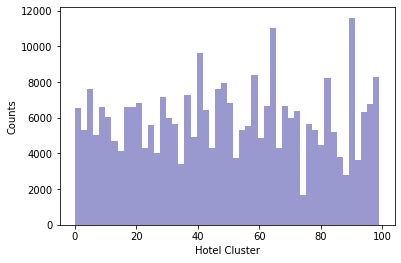

In [36]:
#What would be map5 if 5 most frequent hotel clusters were predicted all the time
#Distibution of hotel cluster
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['hotel_cluster'], color='darkblue', kde=False, norm_hist=False)
plt.xlabel('Hotel Cluster')
plt.ylabel('Counts')

In [37]:
train['hotel_cluster'].value_counts()/train.shape[0]

91    0.027935
41    0.020317
48    0.020010
64    0.019056
65    0.017805
5     0.016370
98    0.015646
59    0.015058
42    0.014838
21    0.014698
18    0.014528
70    0.014328
25    0.014328
62    0.014151
83    0.014054
46    0.013971
82    0.013490
95    0.013437
68    0.013337
28    0.013220
9     0.013217
30    0.013016
58    0.012963
37    0.012856
50    0.012806
72    0.012576
97    0.012426
16    0.012242
99    0.011945
1     0.011825
        ...   
19    0.007511
84    0.007508
38    0.007434
66    0.007364
67    0.007004
31    0.006987
87    0.006947
12    0.006894
23    0.006790
7     0.006713
43    0.006680
49    0.006563
92    0.006470
89    0.006380
54    0.006380
45    0.006353
3     0.005946
60    0.005903
80    0.005809
86    0.005712
71    0.005582
93    0.005566
14    0.005085
75    0.004281
24    0.004254
53    0.003610
35    0.003530
88    0.002856
27    0.002786
74    0.001225
Name: hotel_cluster, Length: 100, dtype: float64

In [ ]:
#Predict 5 most frequent clusters for the test set
test['p1']=91
test['p2']=41
test['p3']=48
test['p4']=64
test['p5']=65
preds=test[['p1','p2','p3','p4','p5']]

In [ ]:
#Define slightly modified map5
#Define the function
def map5eval(preds, actual):
    predicted = preds
    metric = 0.
    for i in range(5):
        metric += np.sum(actual==predicted[:,i])/(i+1)
    metric /= actual.shape[0]
    return 'MAP@5', -metric

In [38]:
y_test=test.hotel_cluster

map5eval(np.array(preds),y_test)

('MAP@5', -0.054107663218774325)